Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    1.339  0.326   0.712    1.931      0.009    0.006    1432.0    1168.0   
theta  0.008  0.161  -0.315    0.292      0.004    0.004    1896.0    1356.0   

       r_hat  
tau      1.0  
theta    1.0  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    1.259  0.319   0.705    1.864      0.008    0.005    1767.0    1434.0   
theta  0.010  0.164  -0.300    0.317      0.004    0.004    1827.0    1100.0   

       r_hat  
tau      1.0  
theta    1.0  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    0.804  0.109   0.598    0.975      0.003    0.002    1578.0    1128.0   
theta  0.008  0.190  -0.324    0.395      0.005    0.005    1519.0    1229.0   

       r_hat  
tau      1.0  
theta    1.0  


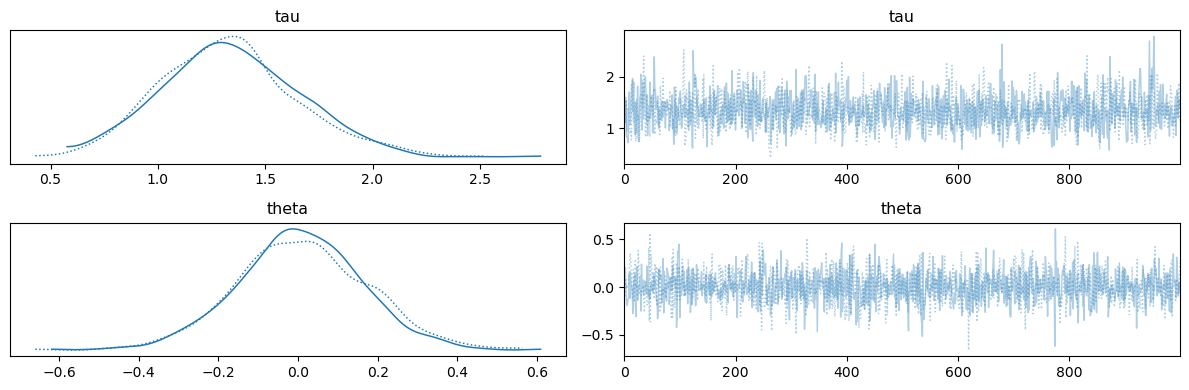

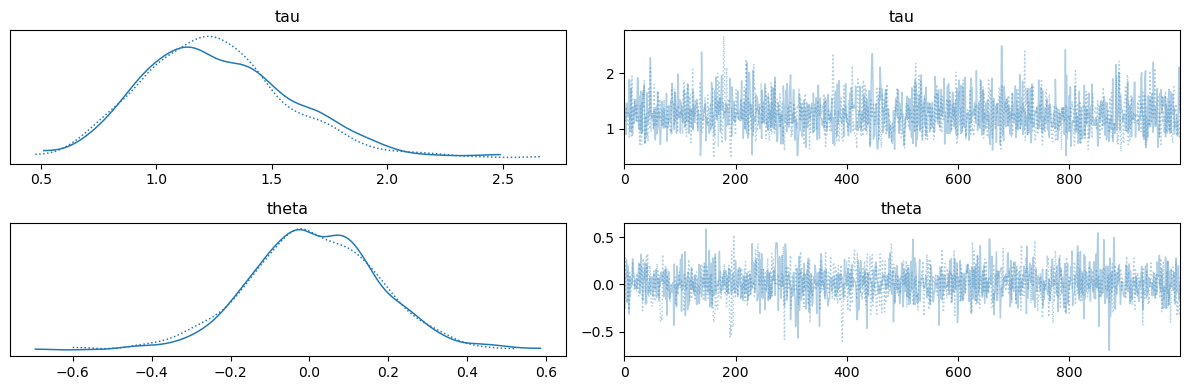

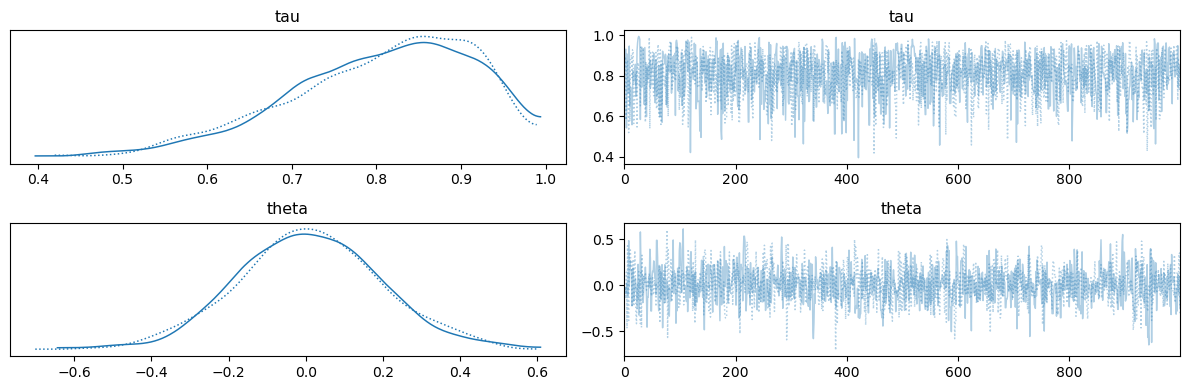

In [1]:
# Q2
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

n = 30
x = np.random.normal(loc=0, scale=1, size=n)

with pm.Model() as model1:
    theta = pm.Normal('theta', mu=0, sigma=1)
    tau = pm.Gamma('tau', alpha=2, beta=1)
    x_obs = pm.Normal('x_obs', mu=theta, tau=tau, observed=x)
    idata1 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(idata1)
plt.tight_layout()
print(az.summary(idata1))

with pm.Model() as model2:
    theta = pm.Uniform('theta', lower=-5, upper=5)
    tau = pm.Exponential('tau', lam=1)
    x_obs = pm.Normal('x_obs', mu=theta, tau=tau, observed=x)
    idata2 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(idata2)
plt.tight_layout()
print(az.summary(idata2))

with pm.Model() as model3:
    theta = pm.Laplace('theta', mu=0, b=1)
    tau = pm.Beta('tau', alpha=2, beta=2)
    x_obs = pm.Normal('x_obs', mu=theta, tau=tau, observed=x)
    idata3 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(idata3)
plt.tight_layout()
print(az.summary(idata3))

In [ ]:
# How the Markov Algorithm of Slice Sampling Works:

#Slice sampling is a Markov Chain Monte Carlo (MCMC) method used to sample from complex distributions when the normalization constant is unknown. The core idea is to introduce an auxiliary variable and sample uniformly from the region under the probability density curve, known as the "slice."

#Steps in the Algorithm:

#Define the Target Function f(x): This is the probability density function (PDF) we want to sample from.

#Initialization: Start with an initial point x.

#Vertical Sampling: Draw a vertical coordinate y uniformly from [0, f(x)]. This defines a horizontal slice under f(x).

#Horizontal Sampling (Slice Sampling): Sample a new x_ uniformly within the horizontal interval where f(x_) > y.

#If f(x_) > y, accept x_ as the new sample.

#If not, shrink the interval and repeat the sampling within the updated interval.

#The functions slice_f_at_y and slice_f_at_y_ implement this process. They iteratively shrink the interval until a suitable x_ is found.

#When using a Metropolis within Gibbs sampler, if the full conditional distributions are known only up to a normalizing constant, slice sampling can be a robust alternative.

#Full Conditional Sampling: Instead of proposing a new state and accepting/rejecting (as in Metropolis-Hastings), slice sampling directly samples from the slice defined by the current state.

#Defining the Slice: The "curve" we sample beneath is the unnormalized full conditional density.

#Initial Value: The current state of the Markov chain serves as the starting point.

#Steps for Gibbs with Slice Sampling:

#Sample y uniformly from [0, f(x_current)].

#Identify the slice: the interval where f(x) > y.

#Sample uniformly from this slice.

#Repeat for each variable in the Gibbs cycle.